In [ ]:
from cem_optimization import cem_optimization
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
target_pos = np.array([-0.3, 0, 0.9])
target_rot = np.array([0, 0.70711, 0.70711, 0])

In [5]:

opt_class = cem_optimization(num_dof=6, num_batch=1000, num_steps=8, maxiter_cem=1,
                           w_pos=1, w_rot=0.5, w_col=10, num_elite=0.05, timestep=0.05)
cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)

start_time = time.time()
cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
dt = time.time()-start_time


 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 1000 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4


In [19]:
start_time = time.time()
cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
dt = time.time()-start_time
dt

0.0031380653381347656

In [ ]:
cost_list = list()
cost_g_list = list()
dt_comp_list = list()
dt_list = list()

num_batch_list = np.linspace(500, 5000, 10, dtype=int)
for num_batch in num_batch_list:
    print(f"Current number of batches: {num_batch}")

    start_time = time.time()
    opt_class = cem_optimization(num_dof=6, num_batch=num_batch, num_steps=8, maxiter_cem=1,
                           w_pos=1, w_rot=0.5, w_col=10, num_elite=0.05, timestep=0.05)
    _ = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt_comp = time.time()-start_time

    start_time = time.time()
    cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt = time.time()-start_time

    cost_list.append(cost)
    cost_g_list.append(cost_g)
    dt_comp_list.append(dt_comp)
    dt_list.append(dt)


Current number of batches: 500

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current number of batches: 1000

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 1000 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current number of batches: 1500

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 1500 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current number of batches: 2000

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 2000 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current nu

In [ ]:
np.savetxt('data/performance/batch_size/cost_list.csv',cost_list, delimiter=",")
np.savetxt('data/performance/batch_size/cost_g_list.csv',cost_g_list, delimiter=",")
np.savetxt('data/performance/batch_size/dt_comp_list.csv',dt_comp_list, delimiter=",")
np.savetxt('data/performance/batch_size/dt_list.csv',dt_list, delimiter=",")

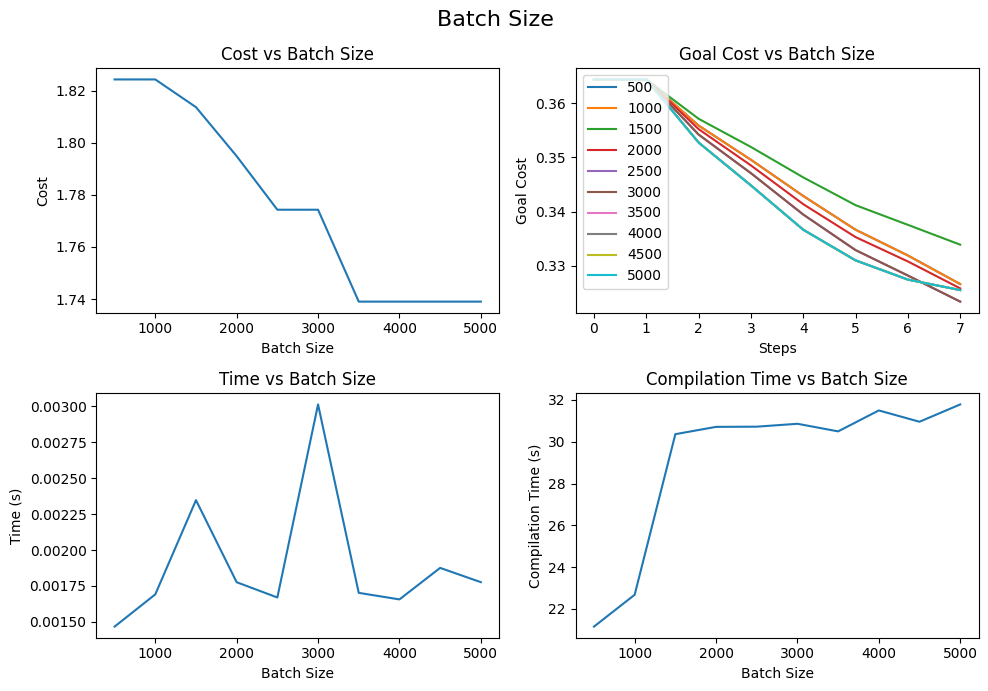

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Batch Size', fontsize=16)
axs = axs.flatten() 

i=0
axs[i].plot(num_batch_list, cost_list)
axs[i].set_title("Cost vs Batch Size")
axs[i].set_xlabel("Batch Size")
axs[i].set_ylabel("Cost")

i+=1
for cost_g in cost_g_list:
    axs[i].plot(cost_g)
axs[i].set_title("Goal Cost vs Batch Size")
axs[i].set_xlabel("Steps")
axs[i].set_ylabel("Goal Cost")
axs[i].legend(num_batch_list, loc='upper left')

i+=1
axs[i].plot(num_batch_list, dt_list)
axs[i].set_title("Time vs Batch Size")
axs[i].set_xlabel("Batch Size")
axs[i].set_ylabel("Time (s)")

i+=1
axs[i].plot(num_batch_list, dt_comp_list)
axs[i].set_title("Compilation Time vs Batch Size")
axs[i].set_xlabel("Batch Size")
axs[i].set_ylabel("Compilation Time (s)")


plt.tight_layout()
plt.savefig(f"{os.path.abspath("")}/img/batch_size.png" )
plt.show()

In [38]:
cost_list = list()
cost_g_list = list()
dt_comp_list = list()
dt_list = list()

num_steps_list = np.linspace(8, 100, 10, dtype=int)
for num_step in num_steps_list:
    print(f"Current number of batches: {num_step}")

    start_time = time.time()
    opt_class = cem_optimization(num_dof=6, num_batch=500, num_steps=num_step, maxiter_cem=1,
                           w_pos=1, w_rot=0.5, w_col=10, num_elite=0.05, timestep=0.05)
    _ = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt_comp = time.time()-start_time

    start_time = time.time()
    cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt = time.time()-start_time

    cost_list.append(cost)
    cost_g_list.append(cost_g)
    dt_comp_list.append(dt_comp)
    dt_list.append(dt)

Current number of batches: 8

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current number of batches: 18

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 18 
 Time per trajectory: 0.9
Current number of batches: 28

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 28 
 Time per trajectory: 1.4000000000000001
Current number of batches: 38

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 38 
 Time per trajectory: 1.90000

In [ ]:
np.savetxt('data/performance/step_num/cost_list.csv',cost_list, delimiter=",")
# np.savetxt('data/performance/step_num/cost_g_list.csv',cost_g_list, delimiter=",")
np.savetxt('data/performance/step_num/dt_comp_list.csv',dt_comp_list, delimiter=",")
np.savetxt('data/performance/step_num/dt_list.csv',dt_list, delimiter=",")

In [43]:
flatten_cost_g_list = np.array([])
for i in cost_g_list:
    flatten_cost_g_list = np.concatenate((flatten_cost_g_list, i))


In [44]:
np.savetxt('data/performance/step_num/cost_g_list.csv',flatten_cost_g_list, delimiter=",")

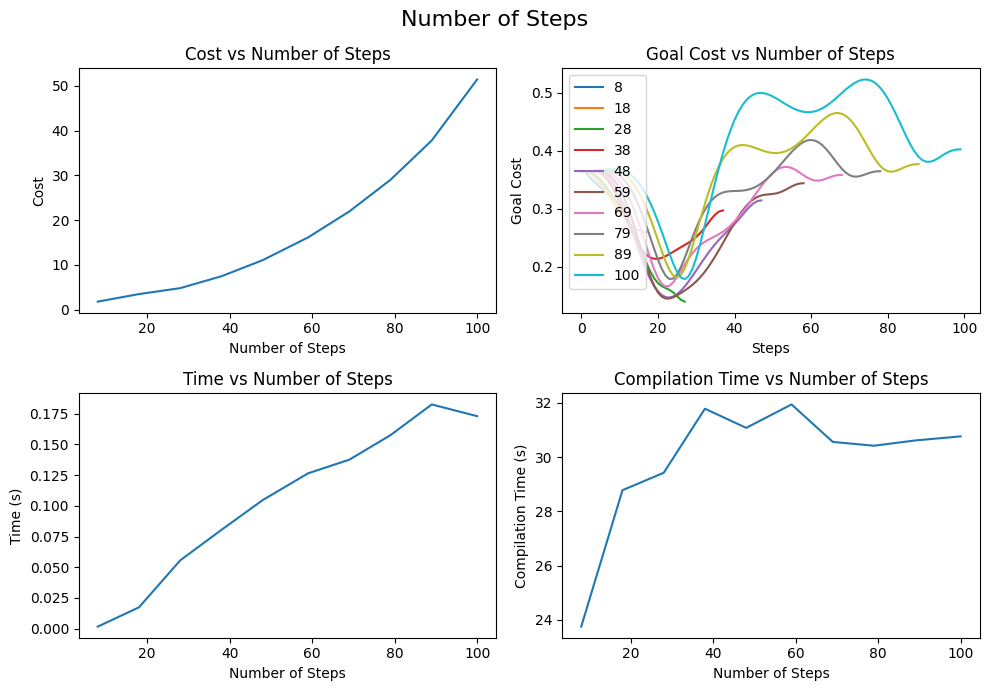

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Number of Steps', fontsize=16)
axs = axs.flatten() 

i=0
axs[i].plot(num_steps_list, cost_list)
axs[i].set_title("Cost vs Number of Steps")
axs[i].set_xlabel("Number of Steps")
axs[i].set_ylabel("Cost")

i+=1
for cost_g in cost_g_list:
    axs[i].plot(cost_g)
axs[i].set_title("Goal Cost vs Number of Steps")
axs[i].set_xlabel("Steps")
axs[i].set_ylabel("Goal Cost")
axs[i].legend(num_steps_list, loc='upper left')

i+=1
axs[i].plot(num_steps_list, dt_list)
axs[i].set_title("Time vs Number of Steps")
axs[i].set_xlabel("Number of Steps")
axs[i].set_ylabel("Time (s)")

i+=1
axs[i].plot(num_steps_list, dt_comp_list)
axs[i].set_title("Compilation Time vs Number of Steps")
axs[i].set_xlabel("Number of Steps")
axs[i].set_ylabel("Compilation Time (s)")


plt.tight_layout()
plt.savefig(f"{os.path.abspath("")}/img/step_num.png" )
plt.show()

In [47]:
cost_list = list()
cost_g_list = list()
dt_comp_list = list()
dt_list = list()

num_steps_list = np.linspace(8, 100, 10, dtype=int)
for num_step in num_steps_list:
    print(f"Current number of steps: {num_step}")

    start_time = time.time()
    opt_class = cem_optimization(num_dof=6, num_batch=1000, num_steps=num_step, maxiter_cem=10,
                           w_pos=1, w_rot=0.5, w_col=10, num_elite=0.05, timestep=0.05)
    _ = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt_comp = time.time()-start_time

    start_time = time.time()
    cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt = time.time()-start_time

    cost_list.append(cost)
    cost_g_list.append(cost_g)
    dt_comp_list.append(dt_comp)
    dt_list.append(dt)

Current number of steps: 8

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 10 
 Number of batches: 1000 
 Number of steps per trajectory: 8 
 Time per trajectory: 0.4
Current number of steps: 18

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 10 
 Number of batches: 1000 
 Number of steps per trajectory: 18 
 Time per trajectory: 0.9
Current number of steps: 28

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 10 
 Number of batches: 1000 
 Number of steps per trajectory: 28 
 Time per trajectory: 1.4000000000000001
Current number of steps: 38

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 10 
 Number of batches: 1000 
 Number of steps per trajectory: 38 
 Time per trajectory: 1.90000

In [48]:
flatten_cost_g_list = np.array([])
for i in cost_g_list:
    flatten_cost_g_list = np.concatenate((flatten_cost_g_list, i))

In [49]:
np.savetxt('data/performance/step_num/cost_list.csv',cost_list, delimiter=",")
np.savetxt('data/performance/step_num/cost_g_list.csv',flatten_cost_g_list, delimiter=",")
np.savetxt('data/performance/step_num/dt_comp_list.csv',dt_comp_list, delimiter=",")
np.savetxt('data/performance/step_num/dt_list.csv',dt_list, delimiter=",")

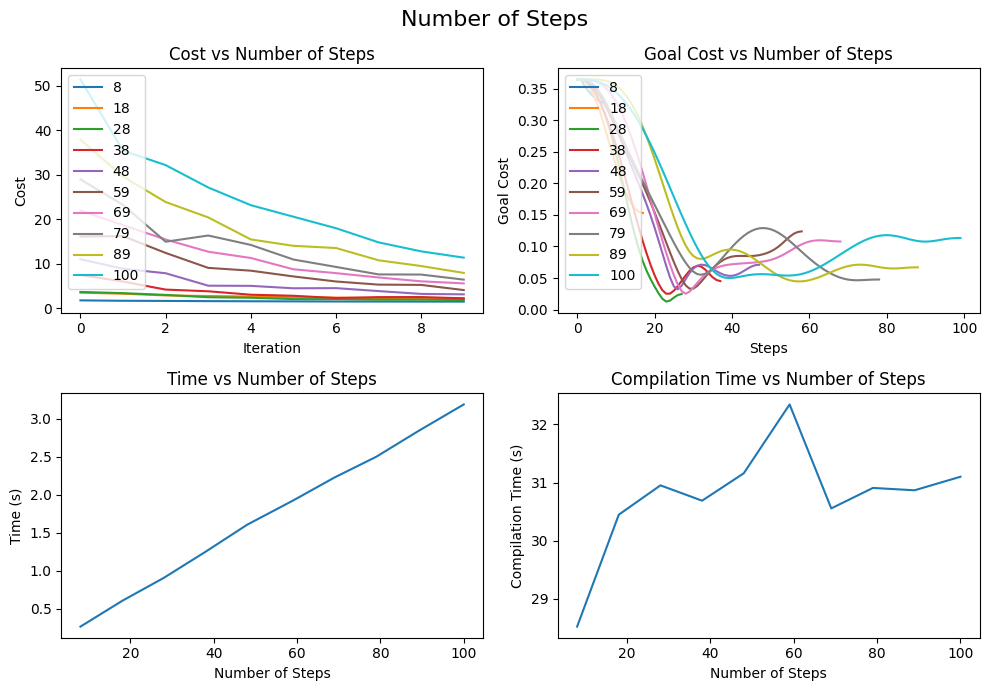

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Number of Steps', fontsize=16)
axs = axs.flatten() 

i=0
for cost in cost_list:
    axs[i].plot(cost)
axs[i].set_title("Cost vs Number of Steps")
axs[i].set_xlabel("Iteration")
axs[i].set_ylabel("Cost")
axs[i].legend(num_steps_list, loc='upper left')

i+=1
for cost_g in cost_g_list:
    axs[i].plot(cost_g)
axs[i].set_title("Goal Cost vs Number of Steps")
axs[i].set_xlabel("Steps")
axs[i].set_ylabel("Goal Cost")
axs[i].legend(num_steps_list, loc='upper left')

i+=1
axs[i].plot(num_steps_list, dt_list)
axs[i].set_title("Time vs Number of Steps")
axs[i].set_xlabel("Number of Steps")
axs[i].set_ylabel("Time (s)")

i+=1
axs[i].plot(num_steps_list, dt_comp_list)
axs[i].set_title("Compilation Time vs Number of Steps")
axs[i].set_xlabel("Number of Steps")
axs[i].set_ylabel("Compilation Time (s)")


plt.tight_layout()
plt.savefig(f"{os.path.abspath("")}/img/step_num_iter.png" )
plt.show()

In [51]:
cost_list = list()
cost_g_list = list()
dt_comp_list = list()
dt_list = list()

num_iter_list = np.linspace(1, 20, 10, dtype=int)
for num_iter in num_iter_list:
    print(f"Current number of iter: {num_iter}")

    start_time = time.time()
    opt_class = cem_optimization(num_dof=6, num_batch=500, num_steps=10, maxiter_cem=num_iter,
                           w_pos=1, w_rot=0.5, w_col=10, num_elite=0.05, timestep=0.05)
    _ = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt_comp = time.time()-start_time

    start_time = time.time()
    cost, cost_g, cost_r, cost_c, thetadot, theta, xi_mean = opt_class.compute_cem(xi_mean=np.zeros(opt_class.nvar), target_pos=target_pos, target_rot=target_rot)
    dt = time.time()-start_time

    cost_list.append(cost)
    cost_g_list.append(cost_g)
    dt_comp_list.append(dt_comp)
    dt_list.append(dt)

Current number of iter: 1

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 1 
 Number of batches: 500 
 Number of steps per trajectory: 10 
 Time per trajectory: 0.5
Current number of iter: 3

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 3 
 Number of batches: 500 
 Number of steps per trajectory: 10 
 Time per trajectory: 0.5
Current number of iter: 5

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 5 
 Number of batches: 500 
 Number of steps per trajectory: 10 
 Time per trajectory: 0.5
Current number of iter: 7

 Default backend: gpu
 Model path: /home/patsyuk/Projects/mjx_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 7 
 Number of batches: 500 
 Number of steps per trajectory: 10 
 Time per trajectory: 0.5
Current number of iter: 9

 Defa

In [52]:
flatten_cost_list = np.array([])
for i in cost_list:
    flatten_cost_list = np.concatenate((flatten_cost_list, i))

In [53]:
np.savetxt('data/performance/iter_num/cost_list.csv',flatten_cost_list, delimiter=",")
np.savetxt('data/performance/iter_num/cost_g_list.csv',flatten_cost_g_list, delimiter=",")
np.savetxt('data/performance/iter_num/dt_comp_list.csv',dt_comp_list, delimiter=",")
np.savetxt('data/performance/iter_num/dt_list.csv',dt_list, delimiter=",")

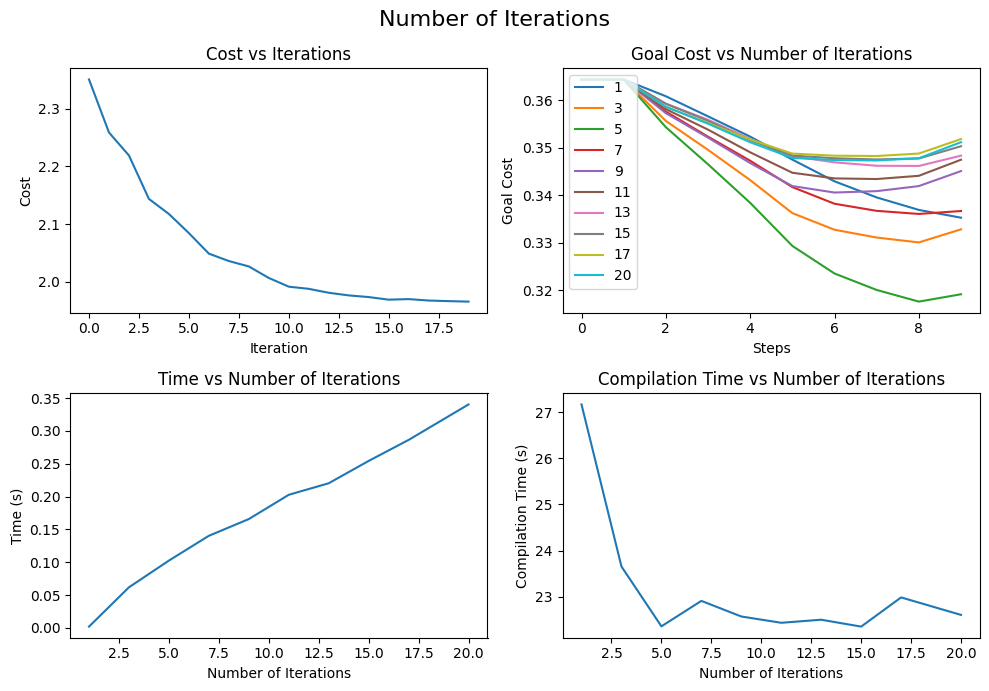

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Number of Iterations', fontsize=16)
axs = axs.flatten() 

i=0
axs[i].plot(cost_list[-1])
axs[i].set_title("Cost vs Iterations")
axs[i].set_xlabel("Iteration")
axs[i].set_ylabel("Cost")
# axs[i].legend(num_iter_list, loc='upper left')

i+=1
for cost_g in cost_g_list:
    axs[i].plot(cost_g)
axs[i].set_title("Goal Cost vs Number of Iterations")
axs[i].set_xlabel("Steps")
axs[i].set_ylabel("Goal Cost")
axs[i].legend(num_iter_list, loc='upper left')

i+=1
axs[i].plot(num_iter_list, dt_list)
axs[i].set_title("Time vs Number of Iterations")
axs[i].set_xlabel("Number of Iterations")
axs[i].set_ylabel("Time (s)")

i+=1
axs[i].plot(num_iter_list, dt_comp_list)
axs[i].set_title("Compilation Time vs Number of Iterations")
axs[i].set_xlabel("Number of Iterations")
axs[i].set_ylabel("Compilation Time (s)")


plt.tight_layout()
plt.savefig(f"{os.path.abspath("")}/img/num_iter.png" )
plt.show()

In [2]:
dt = list()
dt_comp = list()

dirs = ['batch_size', 'iter_num', 'step_num']

dt_file_path = f"{os.path.abspath("")}/data/performance" 
dt_comp_file_path = f"{os.path.abspath("")}/data/performance" 


for folder in dirs:
    dt.append(np.genfromtxt(dt_file_path+f'/{folder}/dt_list.csv', delimiter=','))
    dt_comp.append(np.genfromtxt(dt_file_path+f'/{folder}/dt_comp_list.csv', delimiter=','))

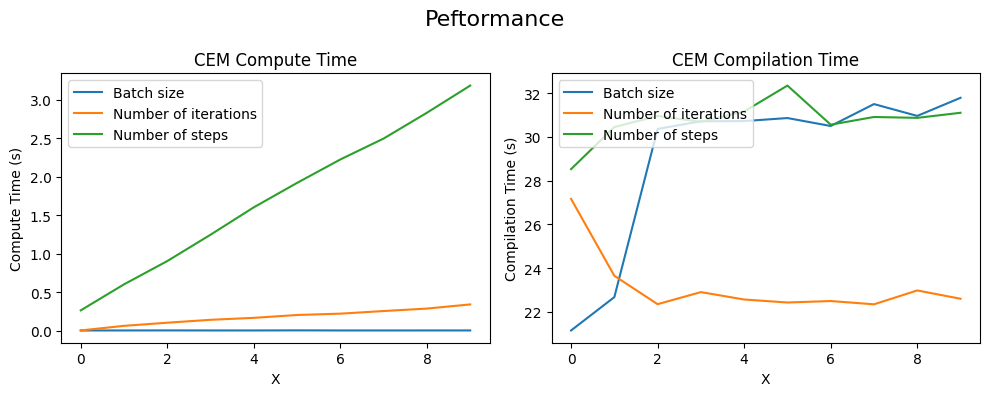

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Peftormance', fontsize=16)
axs = axs.flatten() 

labels = ['Batch size', 'Number of iterations', 'Number of steps']


i=0
for _dt in dt:
    axs[i].plot(_dt)
axs[i].set_title("CEM Compute Time")
axs[i].set_xlabel("X")
axs[i].set_ylabel("Compute Time (s)")
axs[i].legend(labels, loc='upper left')

i+=1
for _dt_comp in dt_comp:
    axs[i].plot(_dt_comp)
axs[i].set_title("CEM Compilation Time")
axs[i].set_xlabel("X")
axs[i].set_ylabel("Compilation Time (s)")
axs[i].legend(labels, loc='upper left')


plt.tight_layout()
plt.savefig(f"{os.path.abspath("")}/img/time_perf.png" )
plt.show()

In [13]:
num_batch_list = np.linspace(500, 5000, 10, dtype=int)
num_steps_list = np.linspace(8, 100, 10, dtype=int)
num_iter_list = np.linspace(1, 20, 10, dtype=int)


In [11]:
import pandas as pd


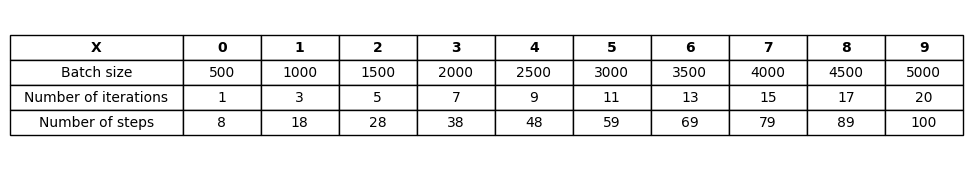

In [96]:
data = {
    "X": np.arange(0, 10),
    "Batch size": num_batch_list,
    "Number of iterations": num_iter_list,
    "Number of steps": num_steps_list
}

df = pd.DataFrame(data)
df_transposed = df.T

fig, ax = plt.subplots(figsize=(10, 1.5)) 
ax.axis('off') 
ax.set_position([0.2, 0, 0.78, 1])
table = ax.table(cellText=df_transposed.values,
                 rowLabels=df_transposed.index,
                 loc='center',
                 cellLoc='center',
                 rowLoc='center')

for col in range(df_transposed.shape[1]):
    cell = table[(0, col)]
    cell.set_text_props(weight='bold')

for key, cell in table.get_celld().items():
    if cell.get_text().get_text() == "X":
        cell.set_text_props(weight='bold')


table.scale(1, 1.5)
plt.savefig(f"{os.path.abspath("")}/img/time_perf_table.png")
plt.show()

In [97]:
plots = plt.imread(f"{os.path.abspath("")}/img/time_perf.png")
table_ = plt.imread(f"{os.path.abspath("")}/img/time_perf_table.png")

In [79]:
print(plots.shape, table_.shape)

(400, 1000, 4) (200, 1000, 4)


In [98]:
joined_img = np.concatenate((plots, table_), axis=0)

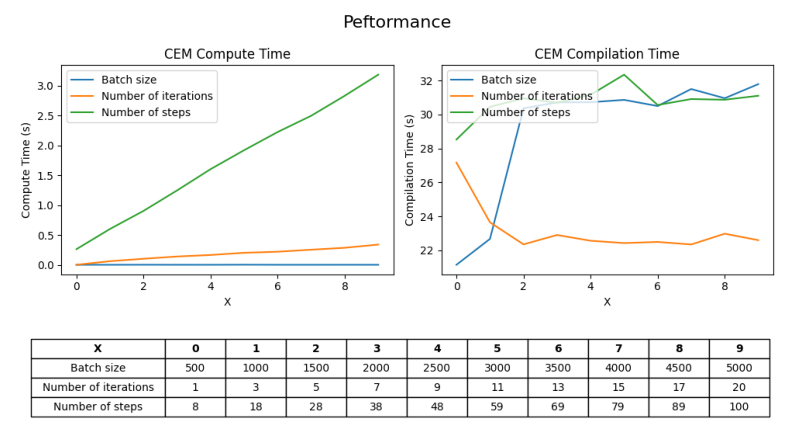

In [101]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.axis('off') 
ax.imshow(joined_img)
plt.savefig(f"{os.path.abspath("")}/img/performance.png", bbox_inches='tight')

plt.show()